In [43]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

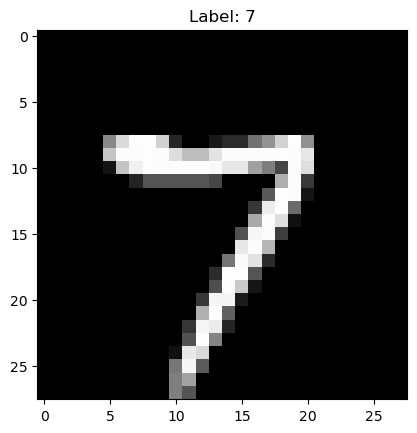

In [44]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# random sample
random_index = np.random.randint(0, len(train_images))
random_image = train_images[random_index]
random_label = train_labels[random_index]

# Display the image and label
plt.imshow(random_image, cmap='gray')
plt.title(f"Label: {random_label}")
plt.show()



In [45]:
# Five examples of activation functions
activation_functions = [
    "ReLU (Rectified Linear Unit)",
    "Sigmoid",
    "Tanh",
    "Softmax",
    "Leaky ReLU"
]

print("Five examples of activation functions:")
for activation_function in activation_functions:
    print("- " + activation_function)

Five examples of activation functions:
- ReLU (Rectified Linear Unit)
- Sigmoid
- Tanh
- Softmax
- Leaky ReLU


### Bulding model using tf.keras.Sequential()

In [46]:
model = models.Sequential()

# Layer 1: Conv3x3 & ReLU & MaxPooling
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Layer 2: Conv3x3 & ReLU & MaxPooling
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Layer 3: Conv3x3 & ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Flattening the output
model.add(layers.Flatten())

# Layer 4: Dense & ReLU & Dropout(0.2)
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.2))

# Layer 5: Dense & Softmax
model.add(layers.Dense(10, activation='softmax'))

In [47]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 3, 3, 32)          4640      
                                                                 
 flatten_5 (Flatten)         (None, 288)              

In [48]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4727 - acc: 0.8960 - val_loss: 0.1107 - val_acc: 0.9671
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1037 - acc: 0.9684 - val_loss: 0.0646 - val_acc: 0.9800
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0765 - acc: 0.9771 - val_loss: 0.0624 - val_acc: 0.9816
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0649 - acc: 0.9804 - val_loss: 0.0595 - val_acc: 0.9817
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0570 - acc: 0.9830 - val_loss: 0.0520 - val_acc: 0.9839
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0502 - acc: 0.9851 - val_loss: 0.0488 - val_acc: 0.9865
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0465 - acc: 0.9851 - val_loss: 0.0492 - val_acc: 0.9841
Epoch 8/10
1875/1875 [==============================] - 8s 4m

### Model Evaluation

313/313 - 1s - loss: 0.0759 - acc: 0.9796 - 561ms/epoch - 2ms/step


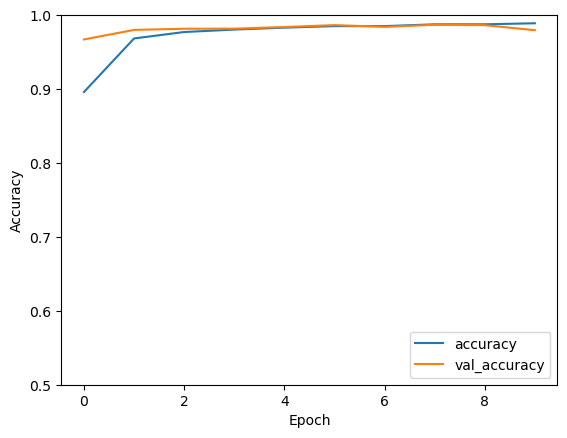

In [49]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [51]:
print("Accuracy: ",test_acc)

Accuracy:  0.9796000123023987
